<a href="https://colab.research.google.com/github/sarthaka2018/Plastic-Waste-Analysis/blob/main/global_plastic_waste_2010(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline 

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
''' reading dataset '''
df = pd.read_csv('/content/per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [3]:
''' displaying first 5 rows '''
df.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [4]:
''' shape of data '''
df.shape

(48168, 7)

# New Section

# New Section

In [5]:
''' checking null values in data '''
df.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [6]:
''' checking percentage of null values in each column '''
for column in df.columns:
    print("{} has {:.2f}% null values: ".format(column, (df[column].isnull().sum() / len(df)) * 100 ))
    print("-" * 100)

Entity has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Code has 4.18% null values: 
----------------------------------------------------------------------------------------------------
Year has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Per capita plastic waste (kg/person/day) has 99.61% null values: 
----------------------------------------------------------------------------------------------------
GDP per capita, PPP (constant 2011 international $) has 86.70% null values: 
----------------------------------------------------------------------------------------------------
Total population (Gapminder, HYDE & UN) has 2.67% null values: 
----------------------------------------------------------------------------------------------------
Continent has 99.41% null values: 
---------------------------------------------------------------

In [7]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [8]:
''' renaming column names '''
df.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [9]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [10]:
''' removing entities/countries with incomplete/missing data '''
incmp_df_idx = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())].index
df.drop(incmp_df_idx, inplace=True)

In [11]:
df.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [12]:
df.shape

(48113, 7)

In [13]:
'''retrieving rows in which year == 2010'''
df_2010 = df[df['Year'] == 2010]
df_2010 = df_2010.drop(columns='Continent')

In [14]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [15]:
'''retrieving continent name in which year == 2015'''
df_2015 = df[df['Year'] == 2015]
df_2010['Continent'] = df_2015['Continent'].values

In [16]:
df_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


In [17]:
'''dropping rows with missing Continent values using index'''
missing_idx = df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_idx, inplace=True)

In [18]:
''' dropping rows with missing per person waste generation values '''
df_2010 = df_2010[df_2010['Waste per person(kg/day)'].notna()]
wa_g = df_2010.reset_index().drop('index', axis=1)

In [19]:
wa_g.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


In [20]:
''' reading 2nd file '''
df2 = pd.read_csv('/content/per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [21]:
''' displaying first 5 rows of df2 '''
df2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [22]:
''' renaming columns'''
df2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [23]:
''' dropping Continent column '''
df2.drop('Continent', axis=1, inplace=True)

In [24]:
'''retrieving rows in which year == 2010'''
df2_2010 = df2[df2.Year == 2010]
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [25]:
''' dropping rows with missing mismanaged waste values '''
df2_2010 = df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].isna() != True]

''' reset index '''
w_m = df2_2010.reset_index().drop('index', axis=1)

In [26]:
w_m.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [27]:
''' merging w_m and wa_g '''
df_plastic_waste = pd.merge(wa_g, w_m, how='inner')

In [28]:
''' displaying data '''
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


In [29]:
''' converting column names into list '''
df_plastic_waste.columns.tolist()

''' column names '''
col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']

df_plastic_waste = df_plastic_waste[col_names]

'''rounding the values per person'''
df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)

''' changing data type '''
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)

In [30]:
'''Generating Total waste and Total mismanaged waste by country'''
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

In [31]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


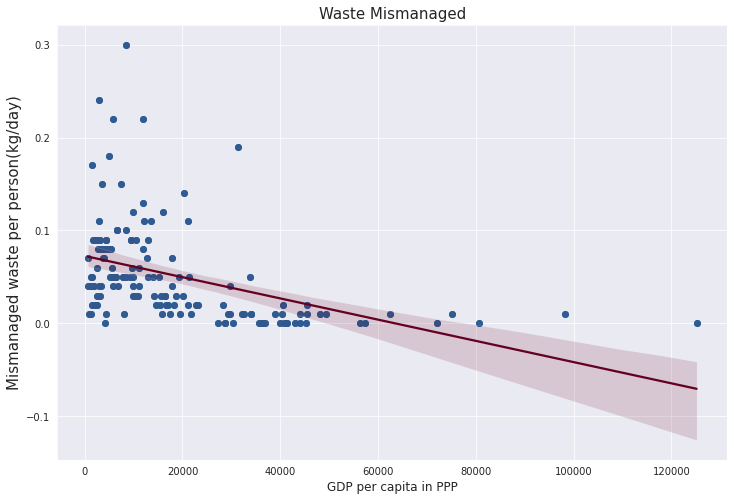

In [32]:
''' scatter plot graph '''

plt.figure(1, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged', loc='center', fontsize=15)
plt.ylabel('Mismanaged waste', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()

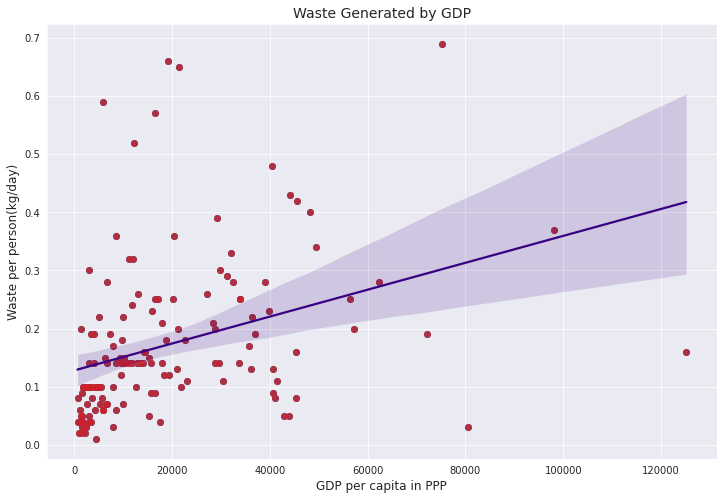

In [33]:
''' scatter plot '''

plt.figure(2, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()

*ANALYSIS OF PANEL DATA*

In [34]:
plastic_waste=df_plastic_waste[['Entity','Code','Year', 'Waste per person(kg/day)','GDP per capita in PPP','Total Population']]
plastic_waste=plastic_waste.set_index(['Code','Year'])

In [35]:
plastic_waste.head()

,,Entity,Waste per person(kg/day),GDP per capita in PPP,Total Population
Code,Year,,,,
ALB,2010,Albania,0.07,9927.181841,2948000
DZA,2010,Algeria,0.14,12870.602699,35977000
AGO,2010,Angola,0.06,5897.682841,23356000
AIA,2010,Anguilla,0.25,NaN,13000
ATG,2010,Antigua and Barbuda,0.66,19212.720131,88000


In [36]:
plastic_waste.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 181 entries, ('ALB', 2010) to ('YEM', 2010)
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    181 non-null    object 
 1   Waste per person(kg/day)  181 non-null    float64
 2   GDP per capita in PPP     148 non-null    float64
 3   Total Population          181 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 12.8+ KB


In [37]:
novalue=plastic_waste[(plastic_waste['GDP per capita in PPP'].isna())].index
new=plastic_waste.drop(novalue,inplace=True)

#incmp_df_idx = df[(df['Total Population'].isna()) & (df['GDP per capita in PPP'].isna())].index
#df.drop(incmp_df_idx, inplace=True)

In [38]:
plastic_waste.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 148 entries, ('ALB', 2010) to ('YEM', 2010)
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    148 non-null    object 
 1   Waste per person(kg/day)  148 non-null    float64
 2   GDP per capita in PPP     148 non-null    float64
 3   Total Population          148 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ KB


In [39]:
years = plastic_waste.index.get_level_values('Year').to_list()
plastic_waste['Year'] = pd.Categorical(years)

In [40]:
#Pooled OLS
%pip install linearmodels
from linearmodels import PooledOLS
import statsmodels.api as sm


     |████████████████████████████████| 1.5 MB 27.7 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |████████████████████████████████| 9.8 MB 54.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [41]:
exog=sm.tools.tools.add_constant(plastic_waste[['GDP per capita in PPP','Total Population']])
endog=plastic_waste['Waste per person(kg/day)']
mod=PooledOLS(endog,exog)
pooledOLS_res=mod.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

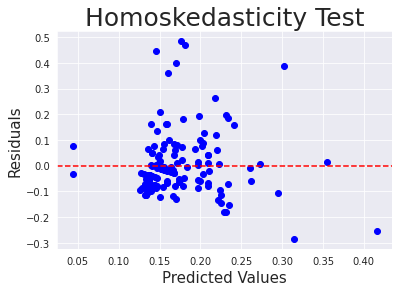

In [42]:
#Residual Tests
#Homoskedasticity
import matplotlib.pyplot as plt
 #1.  Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 25)
plt.show()

Here we see that, since the plotted points are not spread out but is concentrated around 0.1 to 0.3 we can say that the data is homoscedastic.

In [43]:
#pooled_OLS_dataset.head()

In [44]:
  #2. White and Breusch-Pagan Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

pooled_OLS_dataset = pd.concat([plastic_waste, residuals_pooled_OLS], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis = 1)
#exog = sm.tools.tools.add_constant(plastic_waste['income']).fillna(0)
white_test_results = het_white(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, white_test_results)))

  # 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 3.6629834954049447, 'LM p-val': 0.45353263223613516, 'F-Stat': 0.9072631756702408, 'F p-val': 0.46154530600998367}
{'LM-Stat': 6.146161224011421, 'LM p-val': 0.04627836933677465, 'F-Stat': 3.1412381405095533, 'F p-val': 0.0461854173508174}


We see in the above case that :- <br>
1. _White Test_ : P-val>0.05
2. _BP Test_    : P-val<0.05 <br>
Though the BP Test fails to reject the null hypothesis of Heteroscedasticity, White Test points towards Homoscedasticity and we take it as *Homoscedastic*.


In [45]:
#Non-Autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual']) 
print(durbin_watson_test_results)

1.9030199007098865


The Durbin-Watson-Test will have one output between 0 – 4. The mean (= 2) would indicate that there is no autocorrelation identified, 0 – 2 means positive autocorrelation (the nearer to zero the higher the correlation), and 2 – 4 means negative autocorrelation (the nearer to four the higher the correlation). <br> In our case, the result is **1.90302**, which indicates almost no autocorrelation, but not a clear result.

In [46]:
print(pooledOLS_res)

                             PooledOLS Estimation Summary                             
Dep. Variable:     Waste per person(kg/day)   R-squared:                        0.1304
Estimator:                        PooledOLS   R-squared (Between):              0.1304
No. Observations:                       148   R-squared (Within):               0.0000
Date:                      Sun, Dec 26 2021   R-squared (Overall):              0.1304
Time:                              07:51:50   Log-likelihood                    99.101
Cov. Estimator:                   Clustered                                           
                                              F-statistic:                      10.875
Entities:                               181   P-value                           0.0000
Avg Obs:                             0.8177   Distribution:                   F(2,145)
Min Obs:                             0.0000                                           
Max Obs:                             1.0000

We see here that all the variables are significant since the p-value is less than 0.05.<br>


---


To interpret the coefficients as:-<br>
1. <u>**GDP Per Capita in PPP**</u> : Ceteris Paribus, an increase in GDP per capita in PPP by $1000 will lead to a rise in Waste per person of 0.0023 KG or 2.3gms per day.

2. <u> **Total Population**</u> : Ceteris Paribus, an increase in population of the nation by 100,000, there will be a fall in waste per kg per day by about 8 x 10<sup>-6</sup> Kg

---

For the R-squared parameter, we see that the value comes out to be 0.1304 which means that 13.04% variation in Waster per person in KG per day is explained by the two endogenous variables that we have used. This value is quite low and hence doesn't make our model a significant one.